## Lession 10: Network null models

We will introduce functions and algorithms of network null models:
- 0K - ER model
- configuration model
- 1K - degree sequence perserving model
- 2K - joint degree matrix perserving model <br>
<br>
We will demonstrate how they can be used on several networks <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random as rn

## Shuffling procedure - basics

Example: promotion of 24 males, and 24 females; 35 promoted (P) and 13 not promoted (NP)

**Data input**<br>
Males: 21 promoted, 3 not promoted<br>
Females: 14 promoted, 10 not promoted

**H0:** Promotion is independent from geneder<br>
**HA:** Promotion is influenced by gender

We want to check which of these hypothesis is maybe true. We will do this using randomisation (shuffling) procedure.

In [2]:
M=[]
for i in range(0,21):
    M.append("P")
for i in range(0,3):
    M.append("NP")

In [3]:
F=[]
for i in range(0,14):
    F.append("P")
for i in range(0,10):
    F.append("NP")

Difference in promotion from the data

In [4]:
sumM=0
sumF=0
for i in range(0,len(M)):
    if M[i]=="P":
        sumM+=1
    if F[i]=="P":
        sumF+=1
df=(1.0*sumM)/(1.0*len(M))-(1.0*sumF)/(1.0*len(F))
print ("Relative difference in promotion between mails and femails is:", df)

Relative difference in promotion between mails and femails is: 0.29166666666666663


Shuffling procedure: in each step we randomly select one element from M and F lists and swap them. This way we keep 

To obtain randomized lists we need to repeat above described step many times. There is no quantitative way to estimate how many times we should repeat the swaping until we obtain randomized list. Empirical expirience says at least length of the list times 10. Here we will repeat shuffling step 240 time, which is the length of the list times 100.  

We also need to create an ensembl of shuffeled lists. So we will repeat shuffling procedure S times. Since we want to obtain the distribution of differences, the larger the S the better. Here S=1000.

In [5]:
data=[]
for j in range(0,1000):
    Msh=M
    Fsh=F
    #shuffling of the lists
    for x in range(0,240):
        #one shuffling step
        iM=rn.randint(0,23)
        iF=rn.randint(0,23)
        pom=Msh[iM]
        Msh[iM]=Fsh[iF]
        Fsh[iF]=pom
    sumMP=0
    sumFP=0
    for i in range(0,24):
        if Msh[i]=="P":
            sumMP+=1
        if Fsh[i]=="P":
            sumFP+=1
    psh=(1.0*sumMP)/24.0-(1.0*sumFP)/24.0
    data.append(psh)

data list contains differences obtained after each shuffling of the lists.

We will plot the distribution of differences

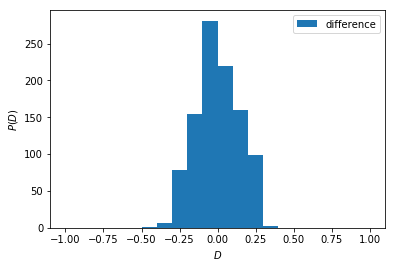

In [6]:
plt.xlabel("$D$")
plt.ylabel('$P(D)$')
bns=[-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(data, bins=bns, density=False, histtype='bar',align='mid',label="difference")
plt.legend()
plt.savefig("dist.png")
plt.show()

We want to calculate the fraction of these differences which are greater or equal to empirically observed one.

In [7]:
data1=[]
for se in data:
    if df<=se:
        data1.append(se)

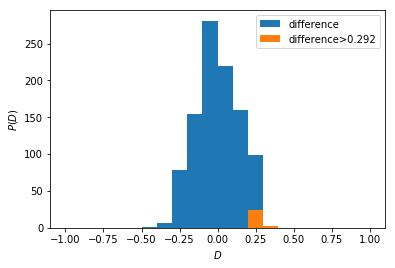

In [8]:
plt.xlabel("$D$")
plt.ylabel('$P(D)$')
bns=[-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(data, bins=bns, density=False, histtype='bar',align='mid',label="difference")
plt.hist(data1, bins=bns, density=False, histtype='bar',align='mid',label="difference>0.292")
plt.legend()
plt.savefig("dist1.png")
plt.show()

In [9]:
print("Fraction of differences larger than empirical one is",(1.0*len(data1))/(1.0*len(data)))

Fraction of differences larger than empirical one is 0.026


We reject null hypothesis. Data provide evidence of sex discrimination against female candidates.

## Network null models

Game of thrones charachter networks.<br>
Network of coappearances of characters in the Game of Thrones series, by George R. R. Martin, and in particular coappearances in the book \"A Storm of Swords.\" Nodes are unique characters, and edges are weighted by the number of times the two characters' names appeared within 15 words of each other in the text. <br>
<br>
It is social, fictional, weighted network, but we will disregard weights.<br>


In [10]:
nodes=pd.read_csv("../data/game_thrones/nodes.csv")

In [11]:
nodes.head()

,# index,name,_pos
0,0,Aemon,"array([-6.26710367, -3.98543356])"
1,1,Grenn,"array([-6.16876976, -4.25622392])"
2,2,Samwell,"array([-6.20040749, -4.16643914])"
3,3,Aerys,"array([-6.22351778, -3.5141172 ])"
4,4,Jaime,"array([-6.08939813, -3.6398448 ])"


In [12]:
edges=pd.read_csv("../data/game_thrones/edges.csv")

In [13]:
edges.head()

,# source,target,weight
0,0,1,5
1,0,2,31
2,2,82,6
3,2,58,34
4,2,76,12


In [14]:
G= nx.from_pandas_edgelist(edges,
                                     source = '# source', 
                                     target = ' target', 
                                     create_using =nx.Graph)

In [15]:
nx.is_connected(G)

True

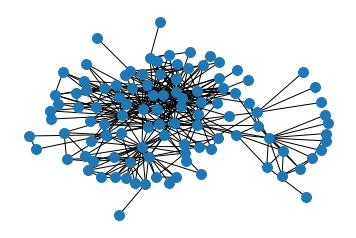

In [16]:
posG=nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=posG, node_size=100)
nx.draw_networkx_edges(G,pos=posG)
plt.box(False)
plt.show()

In [17]:
N=G.number_of_nodes()
L=G.number_of_edges()
degG=[]
for v in G.nodes():
    degG.append(G.degree(v))
kavr=np.mean(np.array(degG))
dm=nx.diameter(G)
lavr=nx.average_shortest_path_length(G)
cavr=nx.average_clustering(G)
r=nx.degree_assortativity_coefficient(G)
print("Number of nodes in graph is:",N)
print("Number of edges in graph is:",L)
print("Average degree of graph is:", kavr)
print("Diameter of graph is:", dm)
print("Average shortest path is:", lavr)
print("Average clustering of graph is:", cavr)
print("Degree assortativity coefficient is:", r)

Number of nodes in graph is: 107
Number of edges in graph is: 352
Average degree of graph is: 6.579439252336448
Diameter of graph is: 6
Average shortest path is: 2.903897019925939
Average clustering of graph is: 0.5514431515599961
Degree assortativity coefficient is: -0.13076968366930292


### Generative network models

#### ER graphs - soft connditions

We fix N and edge probability. First we calculate the edge probability:

In [18]:
po=(2.0*L)/(1.0*N*(N-1))
print("Edge probability is:", po)

Edge probability is: 0.062070181625815554


We will generate S=100 Erdos-Renyi graphs with p=po and N nodes.

In [19]:
degER=[]
degaER=[]
cER=[]
rER=[]
NER=[]
LER=[]
for s in range(0,100):
    ER=nx.erdos_renyi_graph(N,po)
    dg=[]
    for v in ER:
        degER.append(ER.degree(v))
        dg.append(ER.degree(v))
    NER.append(ER.number_of_nodes())
    LER.append(ER.number_of_edges())
    degaER.append(np.mean(np.array(dg)))
    cer=nx.average_clustering(ER)
    rer=nx.degree_assortativity_coefficient(ER)
    cER.append(cer)
    rER.append(rer)

Number of nodes and edges, and average degree of ER graphs.

In [20]:
print("Average number of nodes in ER graphs is:", np.mean(np.array(NER)))

Average number of nodes in ER graphs is: 107.0


In [21]:
print("Average number of edges in ER graphs is:", np.mean(np.array(LER)))
print("Standard deviation of aerage number of edges in ER graphs is:", np.mean(np.std(LER,ddof=1)))

Average number of edges in ER graphs is: 352.14
Standard deviation of aerage number of edges in ER graphs is: 20.674006516748165


In [22]:
print(L)

352


In [23]:
print("Average degree of ER graphs is:",np.mean(np.array(degaER)))
print("Standard deviation of average degree of ER graphs is:",np.mean(np.std(degaER,ddof=1)))

Average degree of ER graphs is: 6.582056074766355
Standard deviation of average degree of ER graphs is: 0.386430028350433


In [24]:
print(kavr)

6.579439252336448


Only number of nodes is fixed, while number of links and average degree are similar to original network on average. We can check this using z-score.

For number of edges:

In [25]:
(L-np.mean(np.array(LER)))/(np.std(LER,ddof=1))

-0.006771788520361127

For average degree:

In [26]:
(kavr-np.mean(np.array(degaER)))/(np.std(degaER,ddof=1))

-0.006771788520360719

What about average clustering and degree assortativity index

In [27]:
print("Average clustering of ER graphs is:",np.mean(np.array(cER)))
print("Standard deviation of average clustering of ER graphs is:",np.mean(np.std(cER,ddof=1)))

Average clustering of ER graphs is: 0.06056528318361742
Standard deviation of average clustering of ER graphs is: 0.010841316063278086


In [28]:
print(cavr)

0.5514431515599961


In [29]:
print("Average degree assortativity index of ER graphs is:",np.mean(np.array(rER)))
print("Standard deviation of average degree assortativity index of ER graphs is:",np.mean(np.std(rER,ddof=1)))

Average degree assortativity index of ER graphs is: -0.02125723198071756
Standard deviation of average degree assortativity index of ER graphs is: 0.05379709954970453


In [30]:
print(r)

-0.13076968366930292


Z-scores

In [31]:
print("Z-score for average clustering is:",(cavr-np.mean(np.array(cER)))/(np.std(cER,ddof=1)))

Z-score for average clustering is: 45.278439030026036


In [32]:
print("Z-score for average degree assortativity index is:",(r-np.mean(np.array(rER)))/(np.std(rER,ddof=1)))

Z-score for average degree assortativity index is: -2.035657174926391


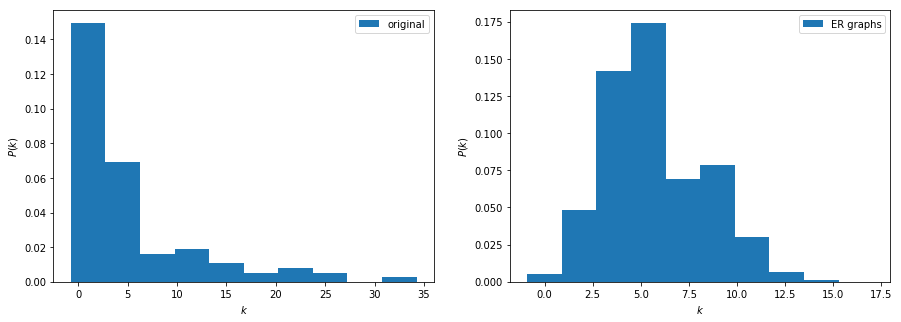

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("$k$")
plt.ylabel('$P(k)$')
plt.hist(degG, bins=10, density=True, histtype='bar',align='left',label="original")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$k$")
plt.ylabel('$P(k)$')
plt.hist(degER, bins=10, density=True, histtype='bar',align='left',label="ER graphs")
plt.legend()

plt.show()

#### Configuration model - hard conditions

We fix N, L, $\langle k \rangle$, and degree sequence

We will generate S=100 configuration model graphs with N nodes, L edges, and degree sequence.

In [34]:
degCM=[]
degaCM=[]
cCM=[]
rCM=[]
NCM=[]
LCM=[]
for s in range(0,100):
    CM=nx.expected_degree_graph(degG)
    dg=[]
    for v in CM:
        degCM.append(CM.degree(v))
        dg.append(CM.degree(v))
    NCM.append(CM.number_of_nodes())
    LCM.append(CM.number_of_edges())
    degaCM.append(np.mean(np.array(dg)))
    ccm=nx.average_clustering(CM)
    rcm=nx.degree_assortativity_coefficient(CM)
    cCM.append(ccm)
    rCM.append(rcm)

Number of nodes and edges, and average degree of CM graphs.

In [35]:
print("Average number of nodes in CM graphs is:", np.mean(np.array(NCM)))

Average number of nodes in CM graphs is: 107.0


In [36]:
print("Average number of edges in CM graphs is:", np.mean(np.array(LCM)))
print("Standard deviation of aerage number of edges in CM graphs is:", np.mean(np.std(LCM,ddof=1)))

Average number of edges in CM graphs is: 353.33
Standard deviation of aerage number of edges in CM graphs is: 16.149587979858556


In [37]:
print(L)

352


In [38]:
print("Average degree of CM graphs is:",np.mean(np.array(degaCM)))
print("Standard deviation of average degree of CM graphs is:",np.mean(np.std(degaCM,ddof=1)))

Average degree of CM graphs is: 6.6042990654205616
Standard deviation of average degree of CM graphs is: 0.30186145756744964


In [39]:
print(kavr)

6.579439252336448


Z-scores

For number of edges:

In [40]:
(L-np.mean(np.array(LCM)))/(np.std(LCM,ddof=1))

-0.08235504222514739

For average degree:

In [41]:
(kavr-np.mean(np.array(degaCM)))/(np.std(degaCM,ddof=1))

-0.08235504222515157

What about average clustering and degree assortativity index

In [42]:
print("Average clustering of CM graphs is:",np.mean(np.array(cCM)))
print("Standard deviation of average clustering of CM graphs is:",np.mean(np.std(cCM,ddof=1)))

Average clustering of CM graphs is: 0.19606762160204125
Standard deviation of average clustering of CM graphs is: 0.022620660317374343


In [43]:
print(cavr)

0.5514431515599961


In [44]:
print("Average degree assortativity index of CM graphs is:",np.mean(np.array(rCM)))
print("Standard deviation of average degree assortativity index of CM graphs is:",np.mean(np.std(rCM,ddof=1)))

Average degree assortativity index of CM graphs is: -0.04968472519733958
Standard deviation of average degree assortativity index of CM graphs is: 0.04282837392548378


In [45]:
print(r)

-0.13076968366930292


Z-scores

In [46]:
print("Z-score for average clustering is:",(cavr-np.mean(np.array(cCM)))/(np.std(cCM,ddof=1)))

Z-score for average clustering is: 15.71021910819288


In [47]:
print("Z-score for average degree assortativity index is:",(r-np.mean(np.array(rCM)))/(np.std(rCM,ddof=1)))

Z-score for average degree assortativity index is: -1.893253258063017


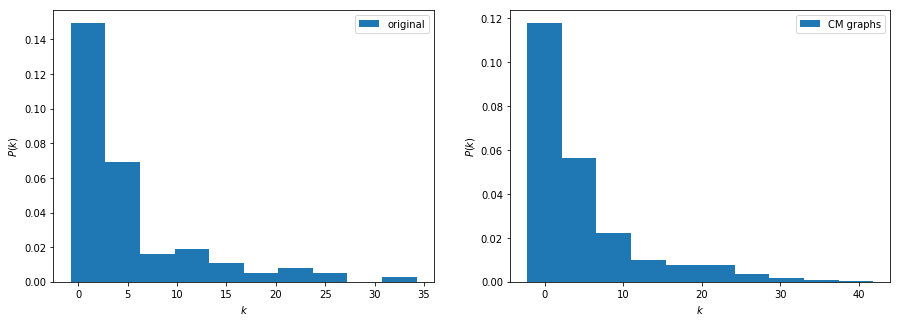

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("$k$")
plt.ylabel('$P(k)$')
plt.hist(degG, bins=10, density=True, histtype='bar',align='left',label="original")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$k$")
plt.ylabel('$P(k)$')
plt.hist(degCM, bins=10, density=True, histtype='bar',align='left',label="CM graphs")
plt.legend()

plt.show()

### Rewiring null models of networks

#### 1K rewiring algorithm

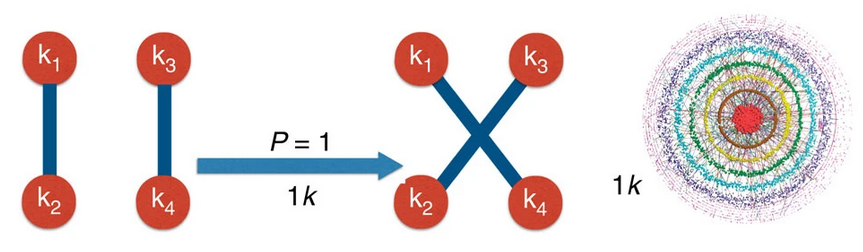

We fix N, L, $\langle k \rangle$, and degree sequence

In [49]:
deg1k=[]
degaG1k=[]
c1k=[]
r1k=[]
N1k=[]
L1k=[]
B1k=[]
labels=[]
for v in G.nodes():
    labels.append(v)
for s in (0,100):
    G1k= nx.from_pandas_edgelist(edges,
                                     source = '# source', 
                                     target = ' target', 
                                     create_using =nx.Graph)
    rw=0
    while rw<=100*L:
        #we select first edge
        i1=rn.randint(0,len(labels)-1)
        v=labels[i1]
        i2=rn.randint(0,G1k.degree(v)-1)
        s=[n for n in G1k.neighbors(v)]
        u=s[i2]
        #we select second edge
        i3=rn.randint(0,len(labels)-1)
        m=labels[i3]
        i4=rn.randint(0,G1k.degree(m)-1)
        s=[n for n in G1k.neighbors(m)]
        l=s[i4]
        if u!=m and u!=l and v!=m and v!=l:
            if G1k.has_edge(v,l)==False and G1k.has_edge(m,u)==False:
                rw+=1
                G1k.remove_edge(v,u)
                G1k.remove_edge(m,l)
                G1k.add_edge(v,l)
                G1k.add_edge(m,u) 
    c1k.append(nx.average_clustering(G1k))
    r1k.append(nx.degree_assortativity_coefficient(G1k))
    dg=[]
    for v in G1k.nodes():
        dg.append(G1k.degree(v))
        deg1k.append(G1k.degree(v))
    degaG1k.append(np.mean(np.array(dg)))
    N1k.append(G1k.number_of_nodes())
    L1k.append(G1k.number_of_edges())
    B=nx.betweenness_centrality(G1k)
    for v in B.keys():
        B1k.append(B[v])

In [50]:
print("Average number of edges in 1K graphs is:", np.mean(np.array(L1k)))
print("Standard deviation of aerage number of edges in 1K graphs is:", np.mean(np.std(L1k,ddof=1)))

Average number of edges in 1K graphs is: 352.0
Standard deviation of aerage number of edges in 1K graphs is: 0.0


In [51]:
print(L)

352


In [52]:
print("Average degree of 1K graphs is:",np.mean(np.array(degaG1k)))
print("Standard deviation of average degree of 1K graphs is:",np.mean(np.std(degaG1k,ddof=1)))

Average degree of 1K graphs is: 6.579439252336448
Standard deviation of average degree of 1K graphs is: 0.0


In [53]:
print(kavr)

6.579439252336448


What about average clustering and degree assortativity index

In [54]:
print("Average clustering of 1K graphs is:",np.mean(np.array(c1k)))
print("Standard deviation of average clustering of 1K graphs is:",np.mean(np.std(c1k,ddof=1)))

Average clustering of 1K graphs is: 0.1879159184299119
Standard deviation of average clustering of 1K graphs is: 0.03557704927656007


In [55]:
print(cavr)

0.5514431515599961


In [56]:
print("Average degree assortativity index of 1K graphs is:",np.mean(np.array(r1k)))
print("Standard deviation of average degree assortativity index of 1K graphs is:",np.mean(np.std(r1k,ddof=1)))

Average degree assortativity index of 1K graphs is: -0.19395909064230024
Standard deviation of average degree assortativity index of 1K graphs is: 0.009914063404155753


In [57]:
print(r)

-0.13076968366930292


Z-scores

In [58]:
print("Z-score for average clustering is:",(cavr-np.mean(np.array(c1k)))/(np.std(c1k,ddof=1)))

Z-score for average clustering is: 10.21802652334054


In [59]:
print("Z-score for average degree assortativity index is:",(r-np.mean(np.array(r1k)))/(np.std(r1k,ddof=1)))

Z-score for average degree assortativity index is: 6.373714227660653


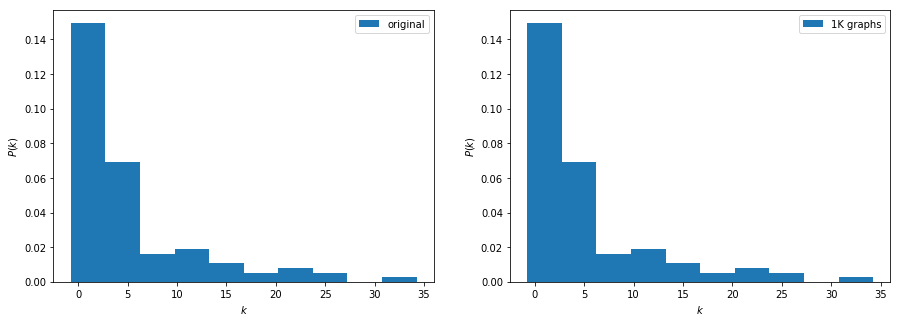

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("$k$")
plt.ylabel('$P(k)$')
plt.hist(degG, bins=10, density=True, histtype='bar',align='left',label="original")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$k$")
plt.ylabel('$P(k)$')
plt.hist(deg1k, bins=10, density=True, histtype='bar',align='left',label="1K graphs")
plt.legend()

plt.show()

Let us calculate the betweenness centrality for original network

In [61]:
B=nx.betweenness_centrality(G)
BG=[]
for v in B.keys():
    BG.append(B[v])

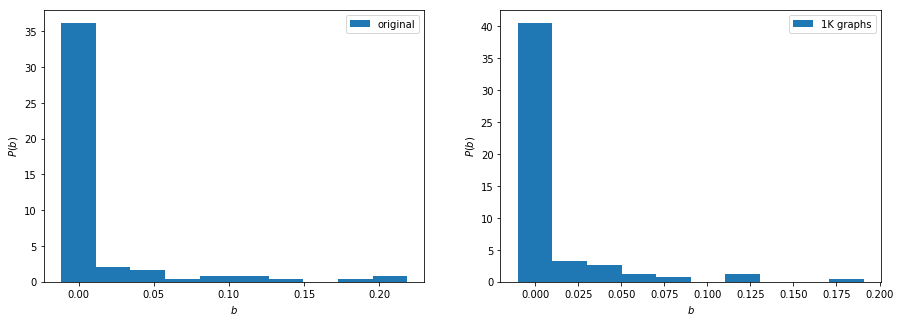

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("$b$")
plt.ylabel('$P(b)$')
plt.hist(BG, bins=10, density=True, histtype='bar',align='left',label="original")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$b$")
plt.ylabel('$P(b)$')
plt.hist(B1k, bins=10, density=True, histtype='bar',align='left',label="1K graphs")
plt.legend()

plt.show()

#### 2K rewiring algorithm¶

We fix N, L, $\langle k \rangle$, degree sequence, and joint degree matrix

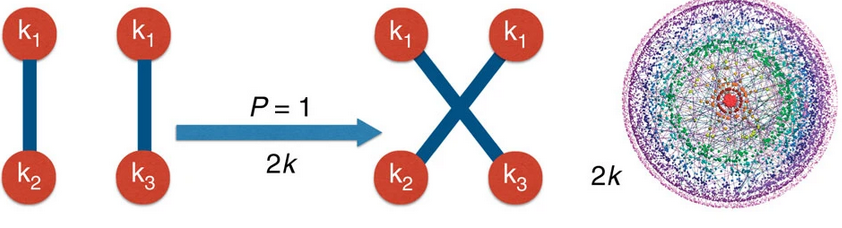

In [64]:
deg2k=[]
degaG2k=[]
c2k=[]
r2k=[]
B2k=[]
for s in range(0,10):
    G2k= nx.from_pandas_edgelist(edges,
                                     source = '# source', 
                                     target = ' target', 
                                     create_using =nx.Graph)
    rw=0
    while rw<=100*L:
        #we select first edge
        i1=rn.randint(0,len(labels)-1)
        v=labels[i1]
        i2=rn.randint(0,G2k.degree(v)-1)
        s=[n for n in G2k.neighbors(v)]
        u=s[i2]
        #we select second edge
        i3=rn.randint(0,len(labels)-1)
        m=labels[i3]
        i4=rn.randint(0,G2k.degree(m)-1)
        s=[n for n in G2k.neighbors(m)]
        l=s[i4]
        if u!=m and u!=l and v!=m and v!=l:
            if G2k.has_edge(v,l)==False and G2k.has_edge(m,u)==False:
                if G2k.degree(v)==G2k.degree(m) or G2k.degree(u)==G2k.degree(l):
                    rw+=1
                    G2k.remove_edge(v,u)
                    G2k.remove_edge(m,l)
                    G2k.add_edge(v,l)
                    G2k.add_edge(m,u)
    c2k.append(nx.average_clustering(G2k))
    r2k.append(nx.degree_assortativity_coefficient(G2k))
    dg=[]
    for v in G2k.nodes():
        dg.append(G2k.degree(v))
        deg2k.append(G2k.degree(v))
    degaG2k.append(np.mean(np.array(dg)))
    B=nx.betweenness_centrality(G2k)
    for v in B.keys():
        B2k.append(B[v])

In [65]:
print("Average clustering of 2K graphs is:",np.mean(np.array(c2k)))
print("Standard deviation of average clustering of 2K graphs is:",np.mean(np.std(c2k,ddof=1)))

Average clustering of 2K graphs is: 0.2044432210449095
Standard deviation of average clustering of 2K graphs is: 0.025671970260442697


In [66]:
print(cavr)

0.5514431515599961


In [67]:
print("Average degree assortativity index of 2K graphs is:",np.mean(np.array(r2k)))
print("Standard deviation of average degree assortativity index of 2K graphs is:",np.mean(np.std(r2k,ddof=1)))

Average degree assortativity index of 2K graphs is: -0.13076968366930292
Standard deviation of average degree assortativity index of 2K graphs is: 0.0


In [68]:
print(r)

-0.13076968366930292


Z-scores

In [69]:
print("Z-score for average clustering is:",(cavr-np.mean(np.array(c2k)))/(np.std(c2k,ddof=1)))

Z-score for average clustering is: 13.516684812064081


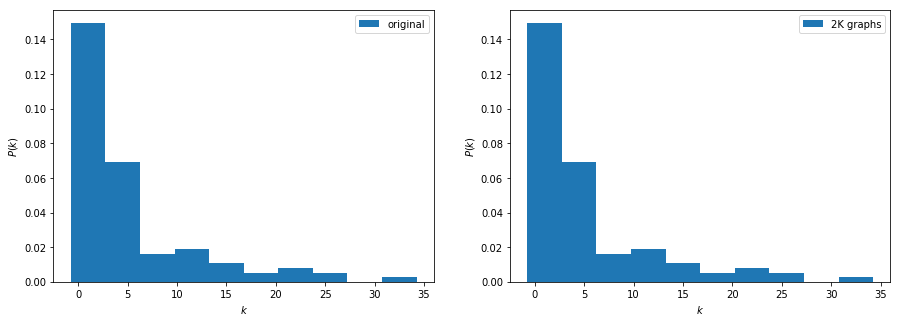

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("$k$")
plt.ylabel('$P(k)$')
plt.hist(degG, bins=10, density=True, histtype='bar',align='left',label="original")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$k$")
plt.ylabel('$P(k)$')
plt.hist(deg2k, bins=10, density=True, histtype='bar',align='left',label="2K graphs")
plt.legend()

plt.show()

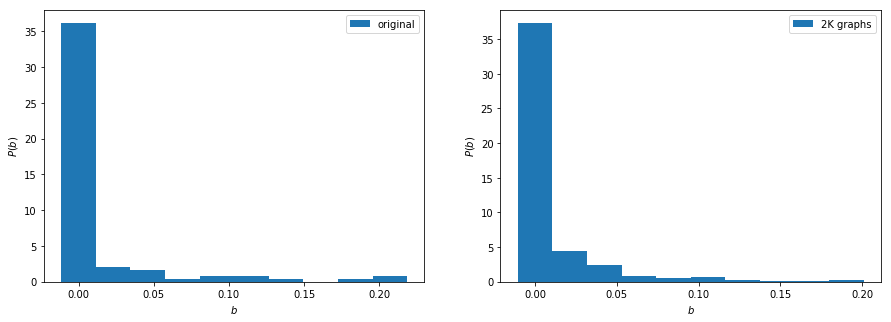

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("$b$")
plt.ylabel('$P(b)$')
plt.hist(BG, bins=10, density=True, histtype='bar',align='left',label="original")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$b$")
plt.ylabel('$P(b)$')
plt.hist(B2k, bins=10, density=True, histtype='bar',align='left',label="2K graphs")
plt.legend()

plt.show()